In [1]:
import sparse_causal_model_learner_rl.learner as learner
from sparse_causal_model_learner_rl.learner import Learner, learner_gin_sacred
from sparse_causal_model_learner_rl.config import Config
from sparse_causal_model_learner_rl.sacred_gin_tune.sacred_wrapper import load_config_files
%matplotlib inline
import vectorincrement
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
import gin

In [2]:
def update_config():
    gin.bind_parameter('Config.train_steps', 100)
    gin.bind_parameter('Config.keep_history', True)

In [3]:
ve_config_path = os.path.join(os.path.dirname(vectorincrement.__file__), 'config', 've5.gin')
learner_config_path = os.path.join(os.path.dirname(learner.__file__), 'configs', 'test.gin')
configs = [ve_config_path, learner_config_path, update_config]
# run = learner_gin_sacred(configs)
load_config_files(configs)

['ve5', 'test', '<function update_config at 0x7fc68e519400>']

In [4]:
learner = Learner(Config())
learner.train()

  1%|          | 1/100 [00:00<00:11,  8.91it/s]

Make environment VectorIncrement-v0 None {}


100%|██████████| 100/100 [00:04<00:00, 21.29it/s]


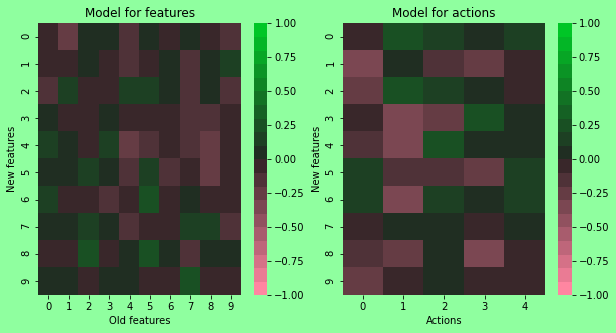

In [5]:
fig = learner.visualize_model()

In [6]:
import cloudpickle as pickle

In [7]:
L_str = pickle.dumps(learner)

In [8]:
learner1 = pickle.loads(L_str)

In [9]:
learner1.model.parameters()

<generator object Module.parameters at 0x7fc68c4d4228>